# MLP: Perceptron, perceptron multi-couches
## Préparation des données
On va prendre 100 exemples pour le corpus d'évaluation et les 335 autres en tant que corpus d'apprentissage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

votes = pd.read_csv('votes.csv')
votes.head()

#Mélange des données et remplace les valeurs par des valeurs numériques
#1=democrat - -1=republican
votesSuffle = votes.sample(frac=1).reset_index(drop=True).replace(['y','n','?','democrat','republican'],[1,-1,0,1,-1])

votesSuffle.head()

,parti,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,-1,1,1,1,1,1,-1,1,-1,-1,-1,-1,1,1,1,-1,1
1,-1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,0,1,1,-1,-1
2,1,1,0,1,-1,0,0,1,1,1,-1,-1,-1,-1,-1,1,0
3,-1,-1,1,-1,1,1,-1,-1,-1,-1,-1,0,0,1,1,-1,-1
4,1,1,-1,1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,-1,0


In [2]:
#On prend les 100 premiers pour le corpus d'évaluation et les 335 dernières pour l'apprentissage
votesEval = votesSuffle.head(100)
votesApp = votesSuffle.tail(335).reset_index(drop=True)

#df.iloc[row,column]

## Etiquette d’une observation à partir d’un vecteur de poids

In [3]:
#Fonction qui pour un vecteur de poids w et un vecteur x contenant les votes d'une personne retourne son parti politique
def classify(w,x):
    f = 0
    
    for i in range(0,(len(w))):
        f += w[i]*x[i]
                   
    if f < 0:
        return -1
    else:
        return 1

## Calcul d'un taux d'erreur

In [4]:
#Fonction qui pour un vecteur de poids et un corpus renvoie son taux d'erreur
def test(w,corpus):
    nbErr = 0
    target = corpus.get('parti')
    for row in range(0,len(corpus)):
        x = []
        #On créé le vecteur de vote d'une personne
        for i in range(1,17):
            x.append(corpus.iloc[row,i])
        #Seuil
        x.append(1)
        #On regarde si la valeur prédite est égale ou non à la valeur réelle
        if classify(w,x) != target[row]:
            nbErr += 1
            
    #Calcul et retour du pourcentage d'erreur
    return ((nbErr/len(corpus))*100)

## Implémentation du perceptron !
Soit on arrête l'algo de correction au bout de N répétitions soit lorsque le taux d'erreur est inférieur ou égal à un taux prédéfini.

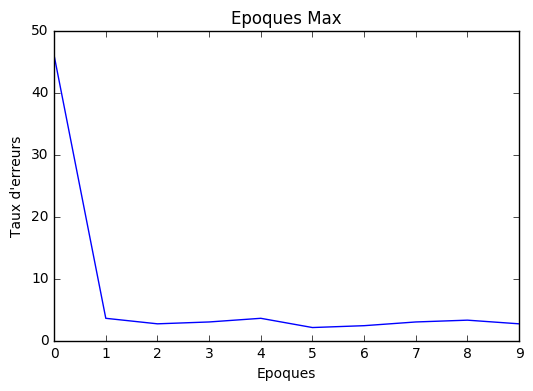

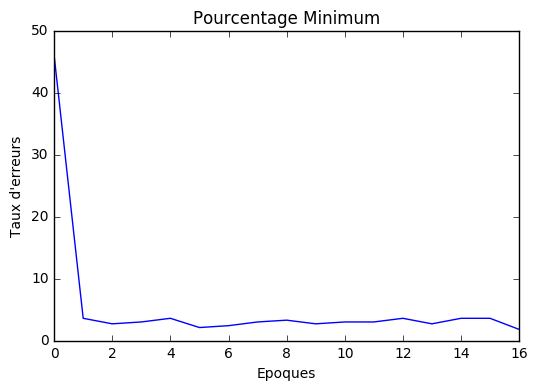

In [5]:
def correction(o,t,w,x,seuil,coeff):
    newW = []
    for y in range(0,(len(w)-1)):
        newW.append(w[y] + (((t-o)*x[y])/2)*coeff)
    newW.append(seuil)
    
    return newW

def tracage(titre,err,ite):
    plt.plot(ite,err)
    plt.title(titre)
    plt.xlabel("Epoques")
    plt.ylabel("Taux d'erreurs")
    plt.show()

def trainNbIterationMax(N):
    seuil = 1
    w = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,seuil]
    PourcErrMin = 1.0
    PourcErr = 100.0
    nEtape = 0
    nEpoque = 0
    corpus = votesApp
    tabPourcErr = []
    iterations = []
    coeff = 0.5
    
    #On répète N fois l'algo de correction
    for i in range(0,N):
        target = corpus.get('parti')
        
        PourcErr = round(test(w, corpus),2)
        iterations.append(nEpoque)
        tabPourcErr.append(PourcErr)
           
        #Pour chaque personne qui a voté dans le corpus
        for row in range(0,len(corpus)):
            x = []
            #On créé le vecteur de vote d'une personne
            for i in range(1,17):
                x.append(corpus.iloc[row,i])
            #Seuil
            x.append(1)

            o = classify(w,x)
            t = target[row]
            #On applique la correction: wt+1 = wt+(t-o)x
            w = correction(o,t,w,x,seuil,coeff)
            if o!=t:
                nEtape += 1
            
        nEpoque += 1
        
    #Tracer de la courbe d'avancement de l'apprentissage
    tracage("Epoques Max",tabPourcErr,iterations)
    #print(nEtape)
    
    return w
    
def trainPourcMin(PourcErrMin):
    seuil = 1
    w = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,seuil]
    PourcErr = 100.0
    nEtape = 0
    nEpoque = 0
    corpus = votesApp
    tabPourcErr = []
    iterations = []
    coeff = 0.5
    
    #On repete l'algo tant qu'on a pas atteint le taux d'erreur demandé
    while PourcErr > PourcErrMin:
        target = corpus.get('parti')
        
        PourcErr = round(test(w, corpus),2)
        iterations.append(nEpoque)
        tabPourcErr.append(PourcErr)

        for row in range(0,len(corpus)):
            x = []
            #On créé le vecteur de vote d'une personne
            for i in range(1,17):
                x.append(corpus.iloc[row,i])
            #Seuil
            x.append(1)

            o = classify(w,x)
            t = target[row]
            #On applique la correction: wt+1 = wt+(t-o)x
            w = correction(o,t,w,x,seuil,coeff)
            if o!=t:
                nEtape += 1
            
        nEpoque += 1
        
    #Tracer de la courbe d'avancement de l'apprentissage
    tracage("Pourcentage Minimum",tabPourcErr,iterations)
    #print(nEtape)
    
    return w

wVector1 = trainNbIterationMax(10)        
wVector2 = trainPourcMin(3.0)

## Application du perceptron sur le corpus de 350 éléments

In [6]:
print("Pourcentage d'erreur sur le corpus de validation avec un nb d'itération max: ", round(test(wVector1,votesEval),2),"%.")
print("Pourcentage d'erreur sur le corpus de validation avec Pourcentage Minimum: ", round(test(wVector2,votesEval),2),"%.")

Pourcentage d'erreur sur le corpus de validation avec un nb d'itération max:  9.0 %.
Pourcentage d'erreur sur le corpus de validation avec Pourcentage Minimum:  8.0 %.


J'ai choisi dans mon algorithme de correction de continuer à évaluer les valeurs du corpus si une erreur se présente, j'aurai aussi pu choisir de reprendre le corpus à zéro.

Nous avons des taux d'erreurs corrects. Pour avoir un taux d'erreur de 0 pour le corpus d'apprentissage il faudrait réduire ce corpus autour de 100 valeurs, ainsi il serait linéairement séparable. De plus pour que le vecteur de poids oscille moins vite j'ai appliqué un learningRate de 0,5. On pourrai appliquer ce learning rate lorque l'on se rapproche du taux d'erreur attendu.